## **Taller Evaluativo 3** 

Elaborado por Valentin Moreno Vasquez y Simón Londoño Rojas

MLOps


## **1 Entendimiento del negocio**

## Objetivo de Negocio

Predecir la probabilidad de enfermedad cardíaca en los pacientes para apoyar la toma de decisiones clínicas, mejorar el diagnóstico temprano y optimizar los recursos médicos.

## Objetivo Analítico

Desarrollar un modelo de clasificación binaria que prediga con alta precisión la probabilidad de enfermedad cardíaca en pacientes, utilizando variables clínicas y biométricas relevantes.

Este conjunto de datos data de 1988 y consta de cuatro bases de datos: Cleveland, Hungría, Suiza y Long Beach V. Contiene 76 atributos, incluido el atributo predicho, pero todos los experimentos publicados utilizan un subconjunto de 14 de ellos. El campo "objetivo" se refiere a la presencia de cardiopatía en el paciente. Su valor es entero: 0 = sin cardiopatía y 1 = con cardiopatía.

Las Variables que se tienen en este dataset son:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## **2.Entendimiento de los datos**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Analisis bivariante categorico**

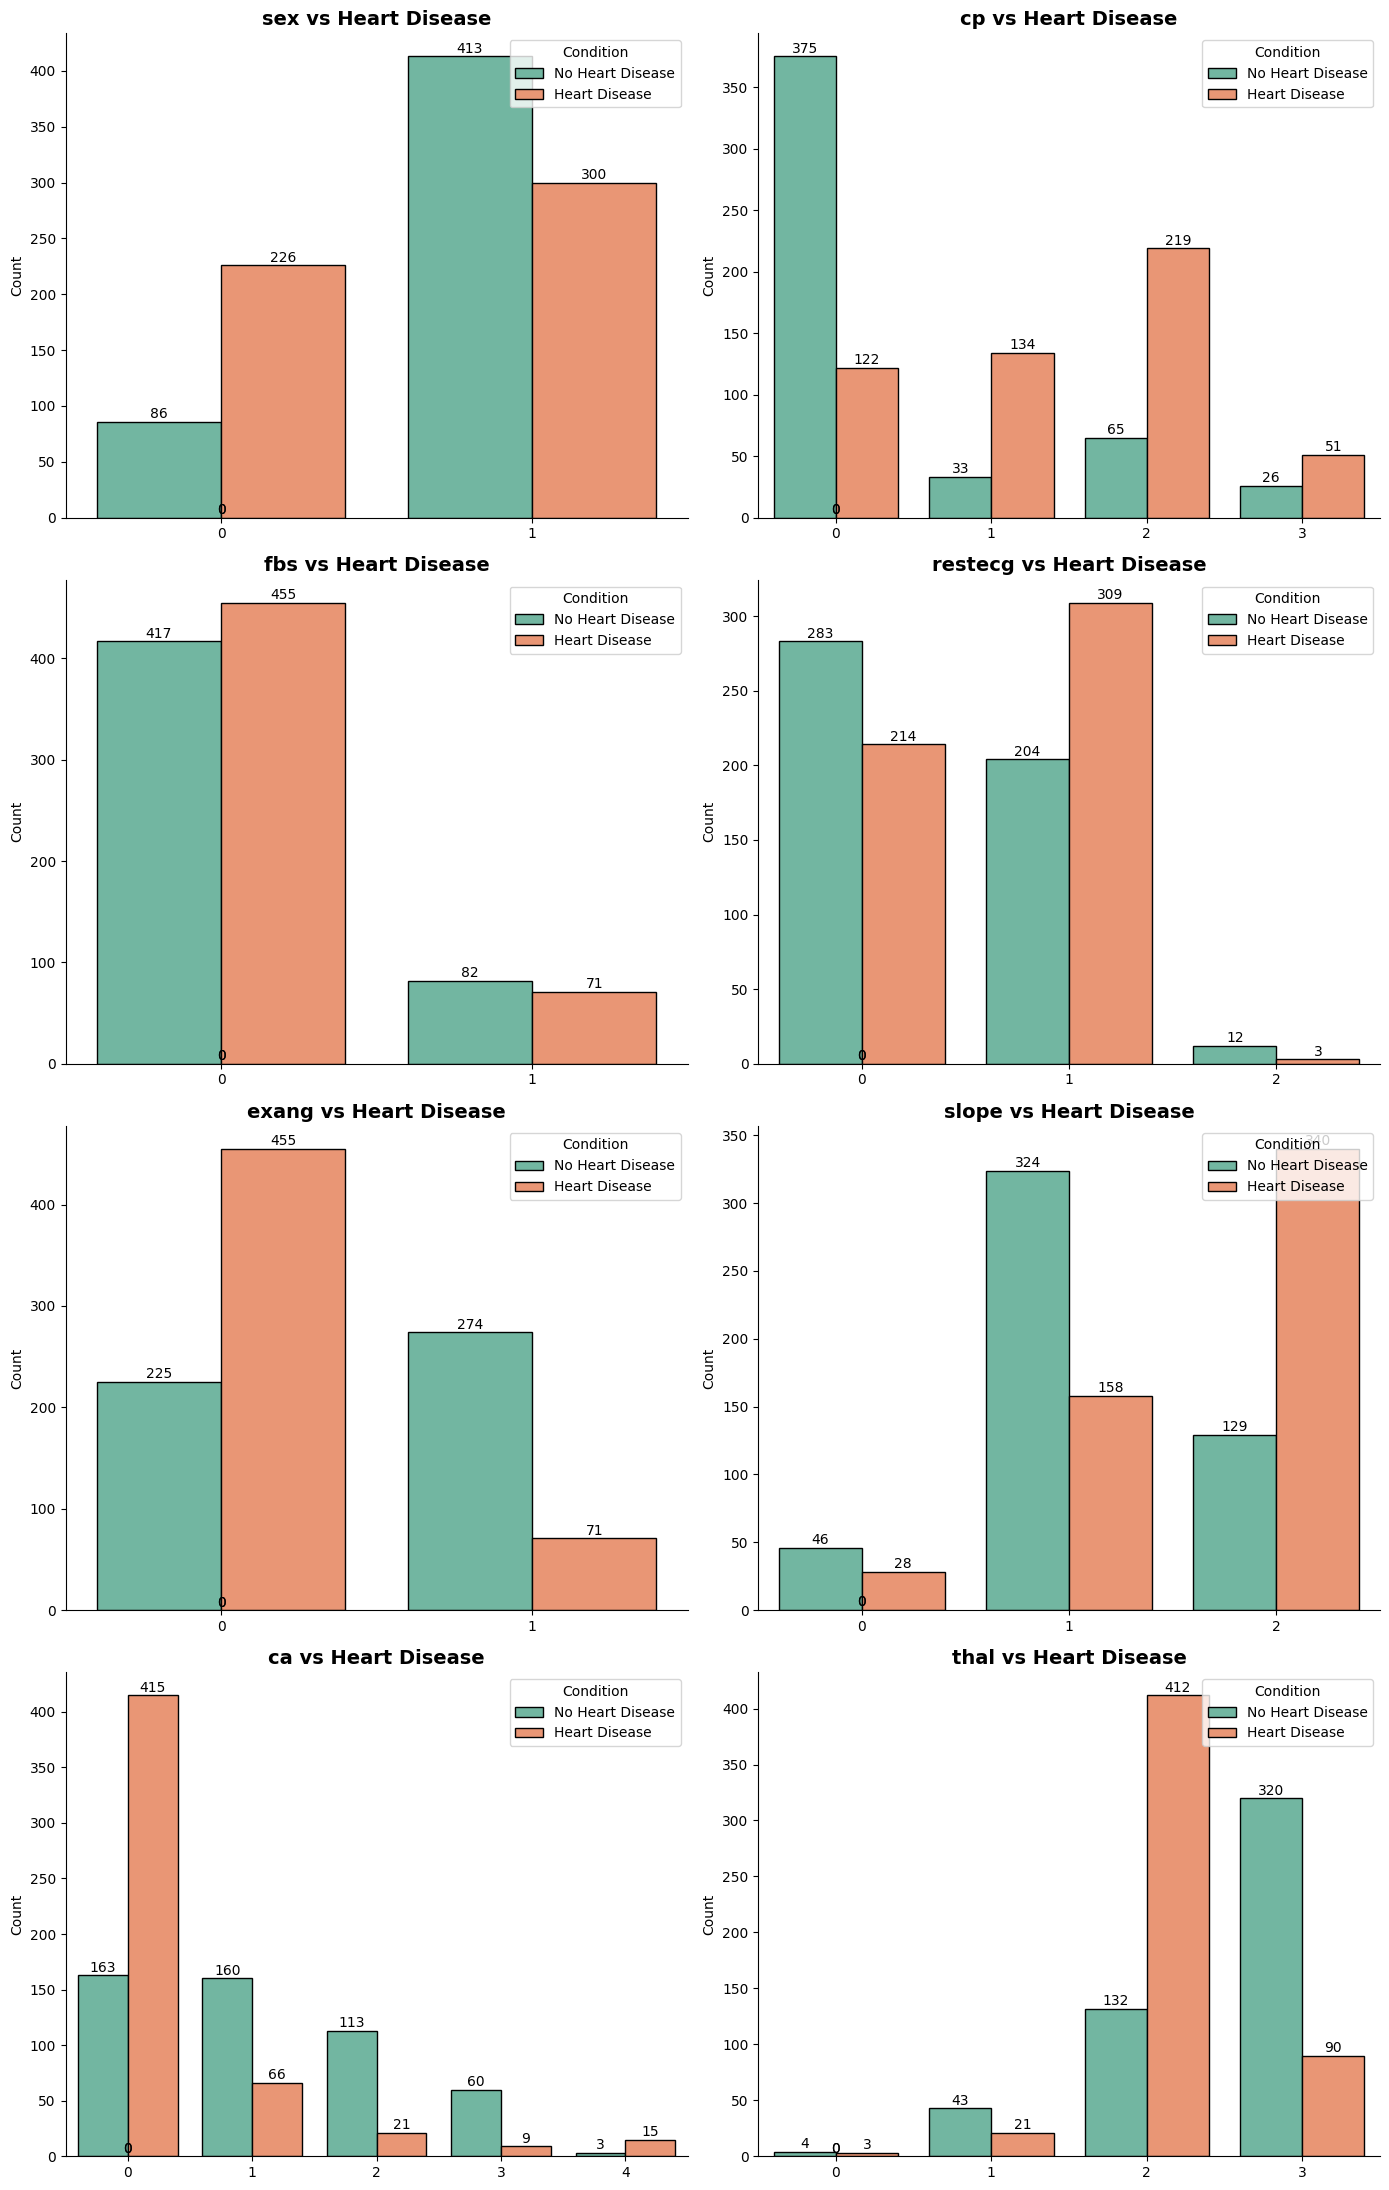

In [7]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Crear subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 22))
axes = axes.flatten()

for i, feature in enumerate(categorical_features[:-1]):

    ax = axes[i]

    sns.countplot(
        data=df,
        x=feature,
        hue="target",
        palette="Set2",
        edgecolor="black",
        ax=ax
    )
    for rect in ax.patches:
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 0.5,
            int(rect.get_height()),
            ha="center",
            va="bottom",
            fontsize=10
        )


    ax.set_title(f"{feature} vs Heart Disease", fontsize=14, fontweight="bold")
    ax.legend(
        title="Condition",
        labels=["No Heart Disease", "Heart Disease"],
        loc="upper right"
    )
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    sns.despine()

plt.tight_layout()
plt.show()

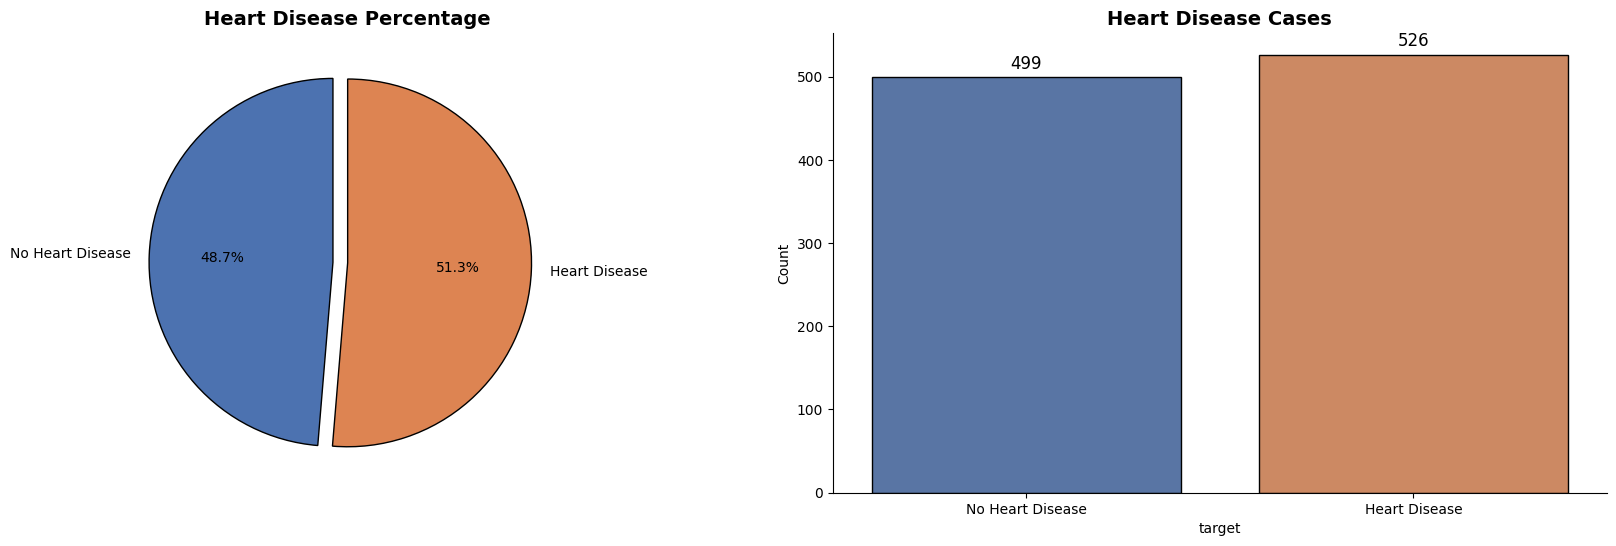

In [6]:
counts = df['target'].value_counts().sort_index()   # asegura orden 0,1
percentages = counts / counts.sum() * 100

colors = ['#4C72B0', '#DD8452']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
plt.tight_layout(pad=4)

axes[0].pie(
    percentages,
    labels=['No Heart Disease', 'Heart Disease'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.08, 0),
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
axes[0].set_title('Heart Disease Percentage', fontsize=14, fontweight='bold')

sns.countplot(
    data=df,
    x='target',
    palette=colors,
    edgecolor='black',
    ax=axes[1]
)

for rect in axes[1].patches:
    axes[1].text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height() + 0.02 * max(counts),
        int(rect.get_height()),
        ha='center',
        fontsize=12
    )

axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Heart Disease', 'Heart Disease'])

axes[1].set_title('Heart Disease Cases', fontsize=14, fontweight='bold')
axes[1].set_ylabel("Count")

sns.despine()

plt.show()

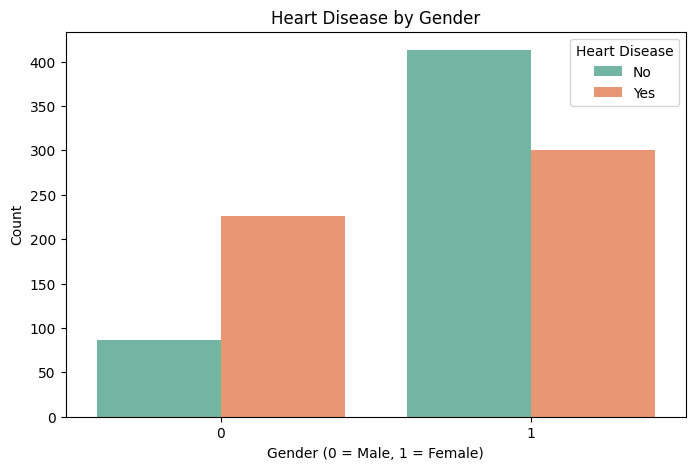

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sex', hue='target', palette='Set2')
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

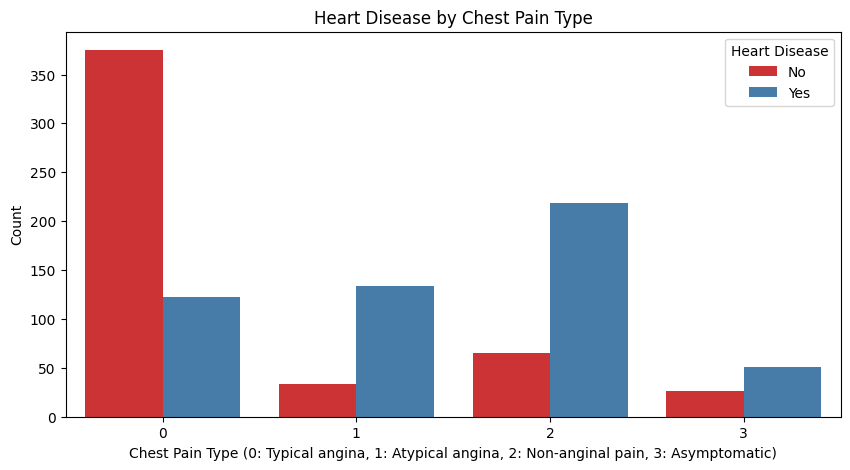

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cp', hue='target', palette='Set1')
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

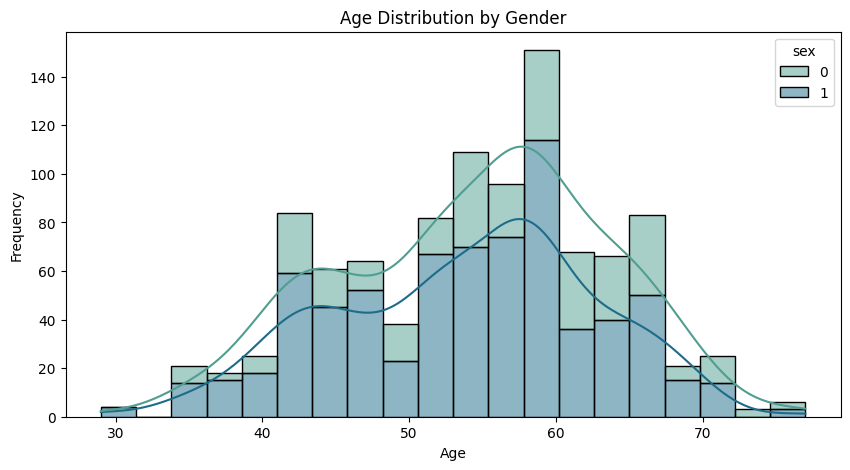

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='sex', multiple='stack', bins=20, kde=True, palette='crest')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## **3 Preparación de los datos**

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop("target", axis=1)  
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        
    random_state=42,
    stratify=y              
)

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = [
    'age',
    'trestbps',
    'chol',
    'thalach',
    'oldpeak'
]

binary_features = [
    'sex',
    'fbs',
    'exang'
]

categorical_features = [
    'cp',
    'restecg',
    'slope',
    'ca',
    'thal'
]

#Pipelines por tipo

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bin', 'passthrough', binary_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [14]:
!pip install mlflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ----------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## **4 Modelación**

In [24]:
import optuna
import mlflow
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

mlflow.set_experiment("Heart_Disease_MLOps_Experimentos")

2025/11/27 11:04:35 INFO mlflow.tracking.fluent: Experiment with name 'Heart_Disease_MLOps_Experimentos' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/Janus/Desktop/taller3mlops/mlruns/944041398255867028', creation_time=1764259475662, experiment_id='944041398255867028', last_update_time=1764259475662, lifecycle_stage='active', name='Heart_Disease_MLOps_Experimentos', tags={}>

## Experimentación y modelado

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, 
    f1_score, roc_auc_score, confusion_matrix,
    classification_report
)
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import mlflow
import seaborn as sns
import matplotlib.pyplot as plt
import os


def objective_lr(trial):

    # hiperparámetro que optuna optimiza
    C = trial.suggest_float("C", 1e-4, 10, log=True)

    # pipeline con preprocesamiento y modelo
    clf = Pipeline([
        ("prep", preprocessor),
        ("model", LogisticRegression(C=C, max_iter=2000))
    ])

    # entrenar
    clf.fit(X_train, y_train)

    # predicciones
    y_pred = clf.predict(X_test)

    # métrica principal
    recall = recall_score(y_test, y_pred)

    # otras métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)

    # auc con validación cruzada
    auc_cv = cross_val_score(
        clf, X_train, y_train, cv=5, scoring="roc_auc"
    ).mean()

    # reporte de clasificación
    report = classification_report(y_test, y_pred)

    # matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # logging en mlflow
    with mlflow.start_run(nested=True):

        # parámetros
        mlflow.log_param("C", C)

        # métricas
        mlflow.log_metric("recall_test", recall)
        mlflow.log_metric("accuracy_test", accuracy)
        mlflow.log_metric("precision_test", precision)
        mlflow.log_metric("f1_test", f1)
        mlflow.log_metric("roc_auc_test", roc)
        mlflow.log_metric("auc_cv_train", auc_cv)

        # artifacts
        os.makedirs("artifacts", exist_ok=True)

        # matriz de confusión
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.xlabel("predicted")
        plt.ylabel("actual")
        plt.title("confusion matrix")
        conf_path = "artifacts/confusion_matrix.png"
        plt.savefig(conf_path)
        plt.close()
        mlflow.log_artifact(conf_path)

        # reporte de clasificación
        report_path = "artifacts/classification_report.txt"
        with open(report_path, "w") as f:
            f.write(report)
        mlflow.log_artifact(report_path)

        # guardar el modelo
        input_example = X_train[:1]
        signature = mlflow.models.infer_signature(
            X_train,
            clf.predict(X_train)
        )

        mlflow.sklearn.log_model(
            clf,
            name="logistic_regression_model",
            input_example=input_example,
            signature=signature
        )

    # optuna maximiza recall
    return recall


study_lr = optuna.create_study(
    direction="maximize",
    study_name="logreg_study"
)
study_lr.optimize(objective_lr, n_trials=20)

[I 2025-11-27 11:04:47,697] A new study created in memory with name: logreg_study
[I 2025-11-27 11:04:51,225] Trial 0 finished with value: 0.8666666666666667 and parameters: {'C': 0.002058969372659242}. Best is trial 0 with value: 0.8666666666666667.
[I 2025-11-27 11:04:54,581] Trial 1 finished with value: 0.9142857142857143 and parameters: {'C': 0.3228319525794662}. Best is trial 1 with value: 0.9142857142857143.
[I 2025-11-27 11:04:57,980] Trial 2 finished with value: 0.9047619047619048 and parameters: {'C': 1.0415419974407385}. Best is trial 1 with value: 0.9142857142857143.
[I 2025-11-27 11:05:01,356] Trial 3 finished with value: 0.9142857142857143 and parameters: {'C': 0.031944759196793945}. Best is trial 1 with value: 0.9142857142857143.
[I 2025-11-27 11:05:04,795] Trial 4 finished with value: 0.8761904761904762 and parameters: {'C': 0.0036520052159900824}. Best is trial 1 with value: 0.9142857142857143.
[I 2025-11-27 11:05:08,284] Trial 5 finished with value: 0.9142857142857143 

In [26]:
from sklearn.ensemble import RandomForestClassifier

def objective_rf(trial):

    # hiperparámetros que optuna probará
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 600),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 15),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10)
    }

    # pipeline con preprocesamiento y modelo
    clf = Pipeline([
        ("prep", preprocessor),
        ("model", RandomForestClassifier(**params, random_state=42))
    ])

    # entrenar
    clf.fit(X_train, y_train)

    # predicciones
    y_pred = clf.predict(X_test)

    # métrica principal (optuna maximiza recall)
    recall = recall_score(y_test, y_pred)

    # métricas completas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    auc_cv = cross_val_score(clf, X_train, y_train, cv=5, scoring="roc_auc").mean()

    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # mlflow logging en un solo run
    with mlflow.start_run(nested=True):

        # log de parámetros
        mlflow.log_params(params)

        # log de métricas
        mlflow.log_metric("recall_test", recall)
        mlflow.log_metric("accuracy_test", accuracy)
        mlflow.log_metric("precision_test", precision)
        mlflow.log_metric("f1_test", f1)
        mlflow.log_metric("roc_auc_test", roc)
        mlflow.log_metric("auc_cv_train", auc_cv)

        # artifacts
        os.makedirs("artifacts", exist_ok=True)

        # matriz de confusión
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.xlabel("predicted")
        plt.ylabel("actual")
        plt.title("confusion matrix — random forest")
        conf_path = "artifacts/confusion_matrix_rf.png"
        plt.savefig(conf_path)
        plt.close()
        mlflow.log_artifact(conf_path)

        # classification report
        report_path = "artifacts/classification_report_rf.txt"
        with open(report_path, "w") as f:
            f.write(report)
        mlflow.log_artifact(report_path)

        # guardar modelo con input example y signature para evitar warnings
        input_example = X_train[:1]
        signature = mlflow.models.infer_signature(X_train, clf.predict(X_train))
        mlflow.sklearn.log_model(
            clf,
            name="rf_model",
            input_example=input_example,
            signature=signature
        )

    # optuna usa solo recall
    return recall

# optuna
study_rf = optuna.create_study(
    direction="maximize",
    study_name="rf_study"
)
study_rf.optimize(objective_rf, n_trials=20)

[I 2025-11-27 11:05:55,944] A new study created in memory with name: rf_study
[I 2025-11-27 11:06:00,094] Trial 0 finished with value: 0.9714285714285714 and parameters: {'n_estimators': 102, 'max_depth': 19, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9714285714285714.
[I 2025-11-27 11:06:06,215] Trial 1 finished with value: 0.9142857142857143 and parameters: {'n_estimators': 480, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9714285714285714.
[I 2025-11-27 11:06:11,049] Trial 2 finished with value: 0.9428571428571428 and parameters: {'n_estimators': 240, 'max_depth': 17, 'min_samples_split': 13, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9714285714285714.
[I 2025-11-27 11:06:17,164] Trial 3 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 477, 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9714285714285714.
[I 2025-11-27

In [27]:
import xgboost as xgb

def objective_xgb(trial):

    # hiperparámetros que optuna probará
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 600),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0)
    }

    # pipeline con preprocesamiento + modelo
    clf = Pipeline([
        ("prep", preprocessor),
        ("model", xgb.XGBClassifier(
            **params,
            eval_metric="logloss",
            use_label_encoder=False,
            random_state=42
        ))
    ])

    # entrenar
    clf.fit(X_train, y_train)

    # predicciones
    y_pred = clf.predict(X_test)

    # métrica principal (optuna maximiza recall)
    recall = recall_score(y_test, y_pred)

    # métricas completas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    auc_cv = cross_val_score(clf, X_train, y_train, cv=5, scoring="roc_auc").mean()

    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # mlflow logging en un solo run
    with mlflow.start_run(nested=True):

        # log de hiperparámetros
        mlflow.log_params(params)

        # log de métricas
        mlflow.log_metric("recall_test", recall)
        mlflow.log_metric("accuracy_test", accuracy)
        mlflow.log_metric("precision_test", precision)
        mlflow.log_metric("f1_test", f1)
        mlflow.log_metric("roc_auc_test", roc)
        mlflow.log_metric("auc_cv_train", auc_cv)

        # artifacts
        os.makedirs("artifacts", exist_ok=True)

        # matriz de confusión
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.xlabel("predicted")
        plt.ylabel("actual")
        plt.title("confusion matrix — xgboost")
        conf_path = "artifacts/confusion_matrix_xgb.png"
        plt.savefig(conf_path)
        plt.close()
        mlflow.log_artifact(conf_path)

        # classification report
        report_path = "artifacts/classification_report_xgb.txt"
        with open(report_path, "w") as f:
            f.write(report)
        mlflow.log_artifact(report_path)

        # guardar modelo con input_example y signature para evitar warnings
        input_example = X_train[:1]
        signature = mlflow.models.infer_signature(X_train, clf.predict(X_train))
        mlflow.sklearn.log_model(
            clf,
            name="xgb_model",
            input_example=input_example,
            signature=signature
        )

    # optuna maximiza recall
    return recall

# optuna
study_xgb = optuna.create_study(
    direction="maximize",
    study_name="xgb_study"
)
study_xgb.optimize(objective_xgb, n_trials=20)

[I 2025-11-27 11:07:50,054] A new study created in memory with name: xgb_study
[I 2025-11-27 11:07:54,153] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 201, 'learning_rate': 0.29555738008795607, 'max_depth': 6, 'subsample': 0.6027825057312576, 'colsample_bytree': 0.6356867058114543}. Best is trial 0 with value: 1.0.
[I 2025-11-27 11:07:58,594] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 414, 'learning_rate': 0.13555327300896805, 'max_depth': 7, 'subsample': 0.5619611262648061, 'colsample_bytree': 0.8384204155263537}. Best is trial 0 with value: 1.0.
[I 2025-11-27 11:08:03,483] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 527, 'learning_rate': 0.18565558442903912, 'max_depth': 9, 'subsample': 0.5558631424424182, 'colsample_bytree': 0.8062633102295096}. Best is trial 0 with value: 1.0.
[I 2025-11-27 11:08:07,616] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 198, 'learning_rate': 0.16062880745399136, 'max

In [ ]:
best_xgb = Pipeline([
    ("prep", preprocessor),
    ("model", xgb.XGBClassifier(**study_xgb.best_params, eval_metric="logloss")) #**study_xgb.best_params con esto ya garantizo que se tomen las mejores metricas en los experimentos
])

best_xgb.fit(X_train, y_train)


,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


##  5 El modelo elegido fue XGBoost aunque el Random Forest se comporto de manera ssimilar ya que tuvieron metricas de desempeño excelentes dentro de ellas esta el recall el cual fue muy alto y en temas de salud esta es una metrica de gran importancia por lo tanto se genero el joblib a partir de XGBoost


In [58]:
from joblib import dump
dump(best_xgb, 'pipeline.joblib')

['pipeline.joblib']